In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import dask.dataframe as dd

In [2]:
df = pd.read_pickle(r'C:\Users\rekha\OneDrive\Documents\Instacart Bascket Analysis\2. Data\prepared Data\orders_products_customers_include.pkl')

In [3]:
path = r'C:\Users\rekha\OneDrive\Documents\Instacart Bascket Analysis'

In [4]:
df = pd.read_pickle(os.path.join(path, '2. Data', 'Prepared Data', 'orders_products_customers_include.pkl'))

In [5]:
df_include = df = pd.read_pickle(os.path.join(path, '2. Data', 'Prepared Data', 'orders_products_customers_include.pkl'))

In [6]:
df_include.shape

(30964564, 34)

In [7]:
df_include.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,surname,Gender,State,Age,date_joined,dependant_no,family_status,income,Region,exclusion_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest,Include
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest,Include
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest,Include
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest,Include
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest,Include


In [8]:
df_include.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404847
Data columns (total 34 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   product_id                  int64         
 1   product_name                object        
 2   aisle_id                    int64         
 3   department_id               int64         
 4   prices                      float64       
 5   order_id                    int64         
 6   user_id                     int64         
 7   order_number                int64         
 8   orders_day_of_week          int64         
 9   order_hour_of_day           int64         
 10  days_since_prior_order      float64       
 11  add_to_cart_order           int64         
 12  reordered                   int64         
 13  _merge                      category      
 14  price_range_loc             object        
 15  Busiest_days                object        
 16  Busiest_period_of_day

In [9]:
df_include.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'price_range_loc', 'Busiest_days',
       'Busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_product_price', 'spending_flag', 'median_days_between_orders',
       'frequency_flag', 'first_name', 'surname', 'Gender', 'State', 'Age',
       'date_joined', 'dependant_no', 'family_status', 'income', 'Region',
       'exclusion_flag'],
      dtype='object')

# 4. Customer profile

## How to  profile customer? 

1.  Categorizing customers by following 4 criteria
    1) age - young / middle / elder
    2) income - low / middle / high
    3) family status - married / non-married

2. link customer profile to 
    1) department_id
    2) which item in the top 3 department
    3) spending (the sum of 'prices' records)

### 4-1) age - young(11) / middle(12) / elder(13)

In [10]:
df_include['Age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

In [11]:
df_include.loc[df_include['Age'] >=65, 'Age_category'] =13
df_include.loc[df_include['Age'] <33, 'Age_category'] =11


In [12]:
df_include['Age_category'].unique()

array([13., nan, 11.])

In [13]:
df_include.loc[df_include['Age_category'].isna(), 'Age_category'] = 12

In [14]:
df_include['Age_category'].value_counts()

Age_category
12.0    15483886
13.0     8195544
11.0     7285134
Name: count, dtype: int64

In [15]:
# changing data type to int8 
    
df_include['Age_category']=df_include['Age_category'].astype('int8')

### 4-2) Income - Low(21) / Mid(22) / High(23)

In [16]:
df_include['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [17]:
df_include.loc[df_include['income'] >=128102, 'income_category'] ='23'
df_include.loc[df_include['income'] <67292, 'income_category'] ='21'

In [18]:
df_include.loc[df_include['income_category'] =='na', 'income_category'] = '22'

In [19]:
df_include['income_category'].value_counts()

income_category
22    15482298
23     7741261
21     7741005
Name: count, dtype: int64

In [20]:
df_include['income_category'].shape

(30964564,)

In [21]:
# changing data type to int8 

df_include['income_category']=df_include['income_category'].astype('int8')
   
  

### 4-3) Family Status - Married 31 / Non-married 32

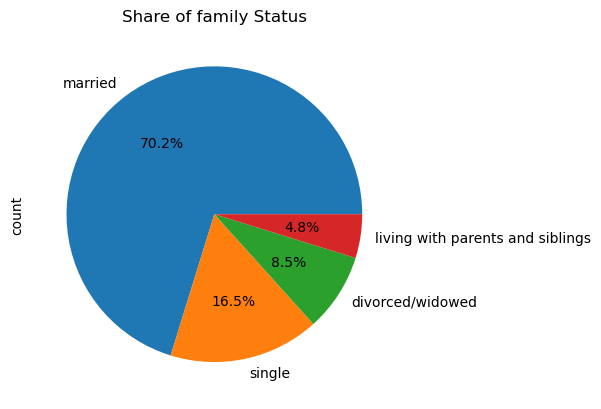

In [22]:
# pie chart - 'Share of family status'

pie_family_status = df_include['family_status'].value_counts().plot.pie(autopct='%1.1f%%', title='Share of family Status')

In [23]:
df_include.loc[df_include['family_status']  == 'married', 'Family_category'] ='31'

In [24]:
df_include.loc[df_include['Family_category']  == 'na', 'Family_category'] ='32'

In [25]:
df_include['Family_category'].shape

(30964564,)

In [26]:
df_include['Family_category'].value_counts()

Family_category
31    21743711
32     9220853
Name: count, dtype: int64

In [27]:
# changing data type to int8 

df_include['Family_category']=df_include['Family_category'].astype('int8')

### 4-4) customer profile - age+income+marriage

In [28]:
import pandas as pd
from itertools import product

In [29]:
#### Define mappings for each category

Age_mapping = {11: 'Young', 12: 'Middle', 13: 'Elder'}
income_mapping = {21: 'Low', 22: 'Mid', 23: 'High'}
family_mapping = {31: 'Married', 32: 'Non-Married'}

In [30]:
#### Generate all combinations

Age_categories = df_include['Age_category'].unique()
income_categories = df_include['income_category'].unique()
family_categories = df_include['Family_category'].unique()
all_combinations = product(Age_categories, income_categories, family_categories)

In [31]:
# Create 'customer_profile' column
df_include['customer_profile'] = ''
    
for combination in all_combinations:
    Age, income, family = combination
    filter_condition = (df_include['Age_category'] == Age) & \
                       (df_include['income_category'] == income) & \
                       (df_include['Family_category'] == family)
    df_include.loc[filter_condition, 'customer_profile'] = f'{Age_mapping[Age]}_{income_mapping[income]}_{family_mapping[family]}'

In [32]:
df_include['customer_profile'].value_counts()

customer_profile
Middle_Mid_Married         5737865
Middle_High_Married        3366928
Elder_Mid_Married          3003430
Middle_Low_Married         2478126
Elder_High_Married         2366940
Young_Mid_Married          2076619
Middle_Mid_Non-Married     1915831
Young_Low_Married          1865367
Young_Mid_Non-Married      1748087
Young_Low_Non-Married      1512981
Middle_High_Non-Married    1154716
Elder_Mid_Non-Married      1000466
Middle_Low_Non-Married      830420
Elder_Low_Married           803216
Elder_High_Non-Married      770597
Elder_Low_Non-Married       250895
Young_High_Married           45220
Young_High_Non-Married       36860
Name: count, dtype: int64

In [33]:
df_include['customer_profile'].shape

(30964564,)

In [ ]:
# Customer profile and department

link customer profile to Top 3 department_id

In [35]:
top_departments = (df_include.groupby('customer_profile')['department_id']
                        .apply(lambda x: x.value_counts().nlargest(3).index.tolist())
                        .reset_index(name='top_department_ids'))

In [36]:
top_departments

,customer_profile,top_department_ids
0,Elder_High_Married,"[4, 16, 7]"
1,Elder_High_Non-Married,"[4, 16, 7]"
2,Elder_Low_Married,"[4, 19, 16]"
3,Elder_Low_Non-Married,"[4, 19, 16]"
4,Elder_Mid_Married,"[4, 16, 19]"
5,Elder_Mid_Non-Married,"[4, 16, 7]"
6,Middle_High_Married,"[4, 16, 7]"
7,Middle_High_Non-Married,"[4, 16, 7]"
8,Middle_Low_Married,"[4, 16, 19]"
9,Middle_Low_Non-Married,"[4, 16, 19]"


In [37]:
#copy result to clipboard for Excel. 

top_departments.to_clipboard()

# findings

- The most-selling department is 4 (produced) following by 16 (dairy eggs) , 7 (beverage), 19 (snaks)
- High income customers spend more for 7. beverage \n",
- In the only Low-income Elder group, the second selling department is 19. snaks, they probably need more 16. dairy eggs, because Elder group with mid and high income consume more 16. dairy eggs
    
# recommendations: 

1) enalarge the variety of beverages, High and mid income group have preference for beverage. 
2) Specific marketing about dairy egg For the health of low-income Elder group, it could be social responsibilty of the company. 
   

In [38]:
# link customer profile to Top 3 days of week

top_days = (df_include.groupby('customer_profile')['orders_day_of_week']
                          .apply(lambda x: x.value_counts().nlargest(3).index.tolist())
                          .reset_index(name='top_order_day_of_week'))
   

In [39]:
top_days

,customer_profile,top_order_day_of_week
0,Elder_High_Married,"[0, 1, 6]"
1,Elder_High_Non-Married,"[0, 1, 6]"
2,Elder_Low_Married,"[1, 0, 2]"
3,Elder_Low_Non-Married,"[1, 0, 5]"
4,Elder_Mid_Married,"[0, 1, 6]"
5,Elder_Mid_Non-Married,"[0, 1, 6]"
6,Middle_High_Married,"[0, 1, 6]"
7,Middle_High_Non-Married,"[0, 1, 6]"
8,Middle_Low_Married,"[1, 0, 2]"
9,Middle_Low_Non-Married,"[1, 0, 5]"


# findings

- all customers visit mostly weekend (0: Saturday, 1: Sunday, 6: Friday / 2: Monday, 5: Thursday)

# Recommendation: 

focus on weekend, from Friday to Sunday. 
   

# Distributions by profiles

#### distribution of customer profile

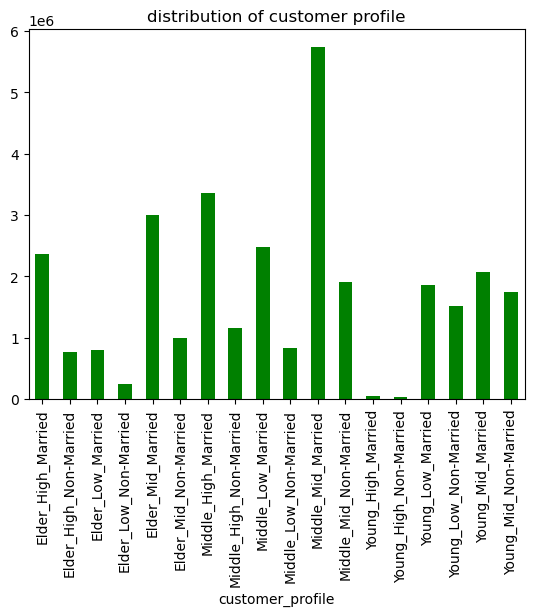

In [40]:
plt.title('distribution of customer profile')
bar_profile = df_include['customer_profile'].value_counts().sort_index().plot.bar(color='green')
   

In [41]:
bar_profile.figure.savefig(os.path.join(path,'4. Analysis/Visualizations/bar_profile.png'))

#### distribution by income

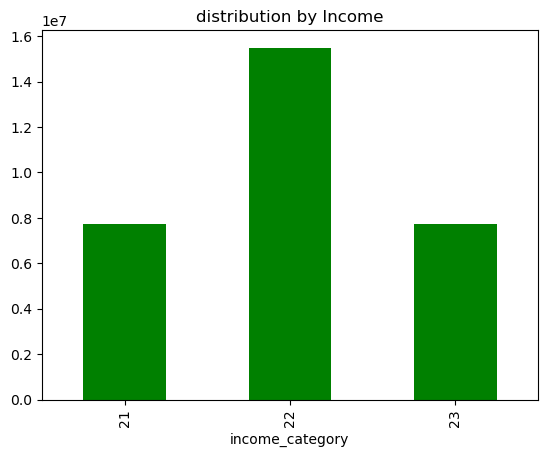

In [42]:
plt.title('distribution by Income')
bar_income_distribution = df_include['income_category'].value_counts().sort_index().plot.bar(color='green')

In [43]:
bar_income_distribution.figure.savefig(os.path.join(path,'4. Analysis/Visualizations/bar_income_distribution.png'))

#### distribution by Age

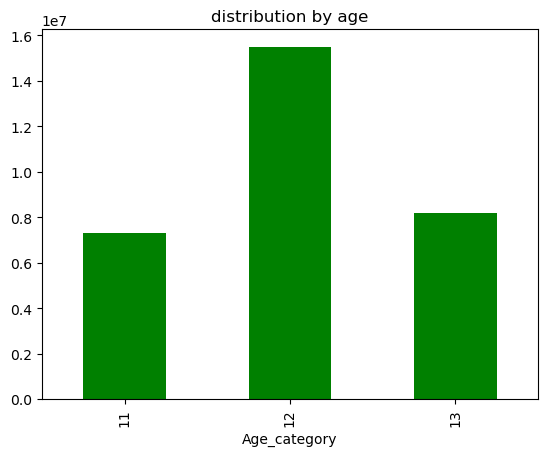

In [44]:
plt.title('distribution by age')
bar_Age_distribution = df_include['Age_category'].value_counts().sort_index().plot.bar(color='green')

In [45]:
bar_Age_distribution.figure.savefig(os.path.join(path,'4. Analysis/Visualizations/bar_age_distribution.png'))

# Findings

- The customers who are middle ages, mid-incom, married are the largest number.

** Largest Number of customer by profile
    1) Middle ages, Mid-incom, Married 
    2) Middle ages, High-income, Married
    3) Elder, Mid-income, Married

** Lowest Number of customer by profile
    1) Yong, High-income, Non Married
    2) Young, High-income, Married
    3) Elder, Low-income, Non Married

# Findings

    1) Middle age are largest customer class
    2) The number of Young mid-low incomes are quite large number regardless marriage

# 7. Customer profile and expenditure 

In [46]:
# Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

### max, mean, min of usage frequency

In [47]:
frequency_profile = df_include.groupby('customer_profile').agg({'days_since_prior_order':['mean', 'min', 'max']})

In [48]:
frequency_profile

days_since_prior_order           
                                          mean  min   max
customer_profile                                         
Elder_High_Married                   10.707685  0.0  30.0
Elder_High_Non-Married               10.738605  0.0  30.0
Elder_Low_Married                    11.028144  0.0  30.0
Elder_Low_Non-Married                11.319335  0.0  30.0
Elder_Mid_Married                    10.810763  0.0  30.0
Elder_Mid_Non-Married                10.654395  0.0  30.0
Middle_High_Married                  10.845658  0.0  30.0
Middle_High_Non-Married              10.659762  0.0  30.0
Middle_Low_Married                   10.977293  0.0  30.0
Middle_Low_Non-Married               10.885662  0.0  30.0
Middle_Mid_Married                   10.735963  0.0  30.0
Middle_Mid_Non-Married               10.755575  0.0  30.0
Young_High_Married                   10.264941  0.0  30.0
Young_High_Non-Married                9.730484  0.0  30.0
Young_Low_Married                    10.903348  0.0  30.0
Young_Low_Non-Married                10.958390  0.0  30.0
Young_Mid_Married                    10.831179  0.0  30.0
Young_Mid_Non-Married                10.746029  0.0  30.0

In [49]:
frequency_profile.to_clipboard()

# findings   

    [image.png](attachment:image.png)
    - Young, high income, non-married customers visit most often by every 9.33 days.
    - Overall, the difference of frequency by customer profile is at most 1 day. 
   

### sum, max, mean, min of expenditure

In [50]:
expend_profile = df_include.groupby('customer_profile').agg({'prices':['sum', 'mean', 'min', 'max']})

In [51]:
expend_profile

prices                          
                                sum        mean  min      max
customer_profile                                             
Elder_High_Married       40406266.3   17.071099  1.0  99999.0
Elder_High_Non-Married   13756894.6   17.852256  1.0  99999.0
Elder_Low_Married         5388175.0    6.708252  1.0     25.0
Elder_Low_Non-Married     1686413.7    6.721592  1.0     25.0
Elder_Mid_Married        26285987.1    8.751989  1.0  99999.0
Elder_Mid_Non-Married     8837571.5    8.833455  1.0  99999.0
Middle_High_Married      69437912.3   20.623522  1.0  99999.0
Middle_High_Non-Married  22550944.5   19.529429  1.0  99999.0
Middle_Low_Married       17838560.4    7.198407  1.0  14900.0
Middle_Low_Non-Married    5974564.6    7.194630  1.0  14900.0
Middle_Mid_Married       51170046.3    8.917959  1.0  99999.0
Middle_Mid_Non-Married   18313419.7    9.558995  1.0  99999.0
Young_High_Married       13221051.7  292.371776  1.0  99999.0
Young_High_Non-Married   10784014.5  292.566861  1.0  99999.0
Young_Low_Married        14205176.8    7.615218  1.0  14900.0
Young_Low_Non-Married    11494175.9    7.597039  1.0     25.0
Young_Mid_Married        21762188.9   10.479625  1.0  99999.0
Young_Mid_Non-Married    16402917.8    9.383353  1.0  99999.0

In [52]:
expend_profile.to_clipboard()

## findings

   
- Middle age mid-income/high_income non-married cutomer spend most on average, and Elder, Low-income customers are least.
- except other conditions, High income customers spend 10.37 on average, while Low-income customers spend 7.16
- The number of married customer takes 70%, but the average expenditure is almost same as non-married.

# 8. Customer profile with regions and department

In [53]:
region_profile = df_include[['Region', 'Age_category', 'income_category', 'Family_category','customer_profile']]

In [54]:
region_profile

,Region,Age_category,income_category,Family_category,customer_profile
0,Midwest,13,21,31,Elder_Low_Married
1,Midwest,13,21,31,Elder_Low_Married
2,Midwest,13,21,31,Elder_Low_Married
3,Midwest,13,21,31,Elder_Low_Married
4,Midwest,13,21,31,Elder_Low_Married
...,...,...,...,...,...
32404843,Northeast,13,21,31,Elder_Low_Married
32404844,Northeast,13,21,31,Elder_Low_Married
32404845,Northeast,13,21,31,Elder_Low_Married
32404846,Northeast,13,21,31,Elder_Low_Married


In [55]:
# Create a DataFrame with proportions

df_proportions = region_profile.groupby(['Region', 'customer_profile']).size().unstack().div(region_profile.groupby('Region').size(), axis=0)

In [56]:
re_profile = region_profile.groupby('Region')['customer_profile'].value_counts()

In [57]:
re_profile

Region   customer_profile      
Midwest  Middle_Mid_Married        1327759
         Middle_High_Married        816907
         Elder_Mid_Married          701759
         Middle_Low_Married         582255
         Elder_High_Married         553685
                                    ...   
West     Elder_Low_Married          212475
         Elder_High_Non-Married     202719
         Elder_Low_Non-Married       63570
         Young_High_Married          12712
         Young_High_Non-Married       7165
Name: count, Length: 72, dtype: int64

In [58]:
re_Age_percentage_table = region_profile.groupby('Region')['customer_profile'].value_counts(normalize=True).unstack() * 100

In [59]:
re_Age_percentage_table

customer_profile,Elder_High_Married,Elder_High_Non-Married,Elder_Low_Married,Elder_Low_Non-Married,Elder_Mid_Married,Elder_Mid_Non-Married,Middle_High_Married,Middle_High_Non-Married,Middle_Low_Married,Middle_Low_Non-Married,Middle_Mid_Married,Middle_Mid_Non-Married,Young_High_Married,Young_High_Non-Married,Young_Low_Married,Young_Low_Non-Married,Young_Mid_Married,Young_Mid_Non-Married
Region,,,,,,,,,,,,,,,,,,
Midwest,7.624926,2.369947,2.458455,0.788637,9.664088,3.315012,11.249818,3.891173,8.018370,2.684496,18.284881,6.432530,0.118309,0.111065,6.108837,4.600942,6.530196,5.748320
Northeast,7.809325,2.674628,2.657408,0.913978,9.771725,3.343889,10.987019,3.390497,8.104969,2.541684,18.405947,5.789977,0.151518,0.109009,5.847638,4.950843,6.785862,5.764083
South,7.643608,2.420916,2.589442,0.776946,9.655383,3.181036,10.543743,3.811509,8.062368,2.744246,18.740073,6.076147,0.151652,0.152001,5.975150,5.001543,6.696302,5.777936
West,7.548125,2.557250,2.680319,0.801920,9.739812,3.141225,10.879403,3.707072,7.841809,2.694852,18.568460,6.380642,0.160359,0.090385,6.132182,4.952791,6.826309,5.297086


C:\Users\rekha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rekha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


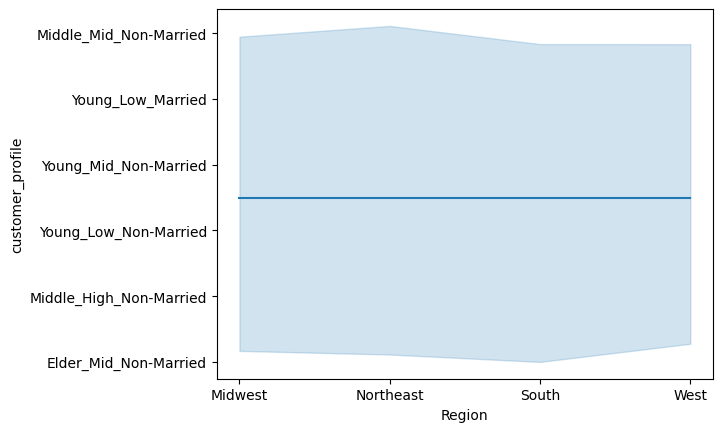

In [60]:
Regionline = sns.lineplot(data = re_profile, x = 'Region',y = 'customer_profile')

#### Findings

- As we can see from the graph, the distribution of cutomer profile in each region is almost same. We cannot find any significant difference. 

In [62]:
profile_departments =df_include[['order_id', 'user_id', 'department_id', 'prices', 'customer_profile']]

In [63]:
profile_departments

,order_id,user_id,department_id,prices,customer_profile
0,3139998,138,19,5.8,Elder_Low_Married
1,1977647,138,19,5.8,Elder_Low_Married
2,3160996,138,12,20.0,Elder_Low_Married
3,2254091,138,12,20.0,Elder_Low_Married
4,505689,138,10,12.9,Elder_Low_Married
...,...,...,...,...,...
32404843,3310701,27382,16,1.8,Elder_Low_Married
32404844,527883,27382,16,1.8,Elder_Low_Married
32404845,685496,27382,16,1.8,Elder_Low_Married
32404846,1224680,27382,16,1.8,Elder_Low_Married


C:\Users\rekha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rekha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


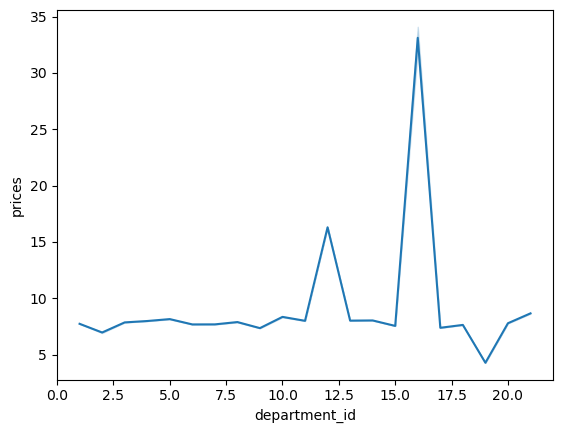

In [64]:
profile_dept = sns.lineplot(data = profile_departments, x = 'department_id',y = 'prices')

In [65]:
import matplotlib.pyplot as plt
import os

# Assuming profile_dept is the Axes object containing your plot
# You first need to get the parent Figure object of the Axes object
figure = profile_dept.get_figure()

# Now you can call savefig() on the Figure object
figure.savefig(os.path.join(path, '4. Analysis/Visualizations/sales_profile.png'))

In [66]:
import matplotlib.pyplot as plt

# Make sure this line is not indented beyond the starting of the block
plt.figure(figsize=(12, 8))

# Other code follows here
# Ensure that it's consistently indented within the same block


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [67]:
import matplotlib.pyplot as plt
import os

# Assuming profile_dept is the Axes object containing your plot
# You first need to get the parent Figure object of the Axes object
figure = profile_dept.get_figure()

# Now you can call savefig() on the Figure object
figure.savefig(os.path.join(path, '4. Analysis/Visualizations/sales_profile.png'))


### findings
- Depending on the customer profile, departmental pricing does not vary significantly.

In [68]:
df_include.shape

(30964564, 38)

In [69]:
Insta_filtered = df_include

In [70]:
Insta_filtered.shape

(30964564, 38)

In [71]:
Insta_filtered.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'price_range_loc', 'Busiest_days',
       'Busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_product_price', 'spending_flag', 'median_days_between_orders',
       'frequency_flag', 'first_name', 'surname', 'Gender', 'State', 'Age',
       'date_joined', 'dependant_no', 'family_status', 'income', 'Region',
       'exclusion_flag', 'Age_category', 'income_category', 'Family_category',
       'customer_profile'],
      dtype='object')

In [72]:
Insta_filtered.to_pickle(os.path.join(path, '2. Data/Prepared Data/Insta_filtered.pkl'))